In [1]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


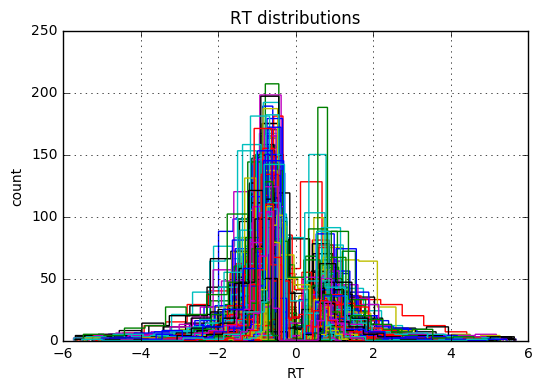

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (fearful) and facial expression (angry)
fa_data = data.loc[(data['emotionRating'] == 'fearful') & (data['expression'] == 'angry')]
fa_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
59,lbmmswtrr0mpvov,1,4,fearful,59,_faces/WF05_A_X.jpg,WF05_A_X,WF05,W,F,angry,baseline,0,-0.805010,100,0,0,0,0,0
63,lbmmswtrr0mpvov,1,4,fearful,63,_faces/WF05_A_U.jpg,WF05_A_U,WF05,W,F,angry,upper,0,-0.661800,50,0,0,0,0,0
65,lbmmswtrr0mpvov,1,4,fearful,65,_faces/HF04_A_X.jpg,HF04_A_X,HF04,H,F,angry,baseline,0,-0.731520,100,0,0,0,0,0
69,lbmmswtrr0mpvov,1,4,fearful,69,_faces/WF05_A_L.jpg,WF05_A_L,WF05,W,F,angry,lower,0,-1.028785,50,0,0,0,0,0
71,lbmmswtrr0mpvov,1,4,fearful,71,_faces/AM07_A_X.jpg,AM07_A_X,AM07,A,M,angry,baseline,0,-0.678935,100,0,0,0,0,0
77,lbmmswtrr0mpvov,1,4,fearful,77,_faces/HF04_A_L.jpg,HF04_A_L,HF04,H,F,angry,lower,0,-0.575825,50,0,0,0,0,0
85,lbmmswtrr0mpvov,1,4,fearful,85,_faces/AM07_A_L.jpg,AM07_A_L,AM07,A,M,angry,lower,0,-0.628250,50,0,0,0,0,0
89,lbmmswtrr0mpvov,1,4,fearful,89,_faces/HF04_A_U.jpg,HF04_A_U,HF04,H,F,angry,upper,0,-0.549520,50,0,0,0,0,0
93,lbmmswtrr0mpvov,1,4,fearful,93,_faces/AM07_A_U.jpg,AM07_A_U,AM07,A,M,angry,upper,0,-0.987905,50,0,0,0,0,0
325,mr81dhy9r5lxu8r,0,4,fearful,2,_faces/WF05_A_U.jpg,WF05_A_U,WF05,W,F,angry,upper,1,1.839000,50,0,0,0,0,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
fa_data = fa_data[(fa_data.subj_idx != 'dqph4ch0mkofejw') & (fa_data.subj_idx != 'hdn2l3df216jykn') & (fa_data.subj_idx != 'tz7c8yczxjyfo0y') & (fa_data.subj_idx != 'xs5439nm2v85thb')]

In [6]:
# define model
m_fa = hddm.HDDMRegressor(fa_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 42377.0 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q        75q        97.5q       mc err
a                                   1.76119   0.0532098     1.65998    1.72441    1.75999    1.79612      1.86975   0.00263619
a_std                              0.554122   0.0486147    0.463569   0.521077    0.55258   0.584204     0.657414   0.00246272
a_subj.09coqg8hlpux6fe              1.40879    0.284513    0.954445    1.20736    1.37705    1.57672      2.06875   0.00769212
a_subj.0b3t2skj9mlhbkn              1.85991    0.484589     1.09356    1.50187    1.80087    2.14911      2.96367    0.0149901
a_subj.0bcg7mtj2n1jjw9              2.70007     0.51084     1.83337    2.33336    2.64811    3.00852      3.85322    0.0117616
a_subj.0s53r30oouek89b              2.54817    0.401117      1.8641    2.26443     2.5055    2.79651      3.44184   0.00974908
a_subj.0uj9gbhag3o1w1v              1.71267    0.350874     1.14375    1.45521     1.6738    1.92498       2.49

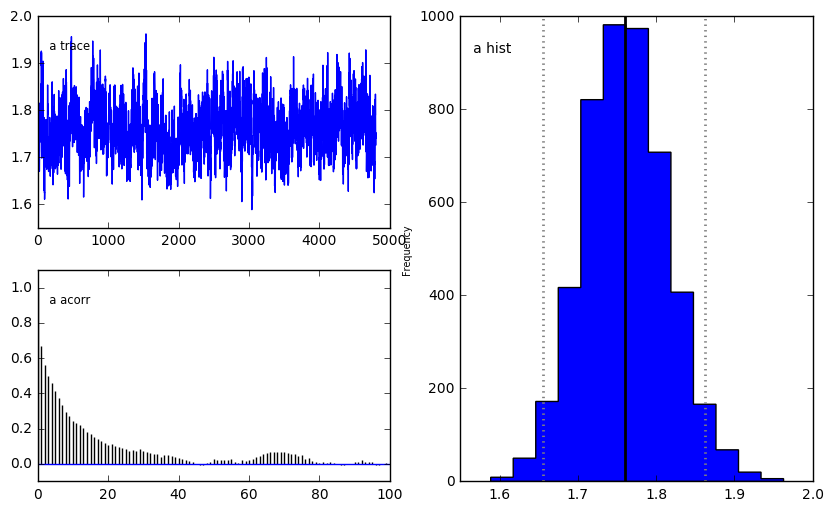

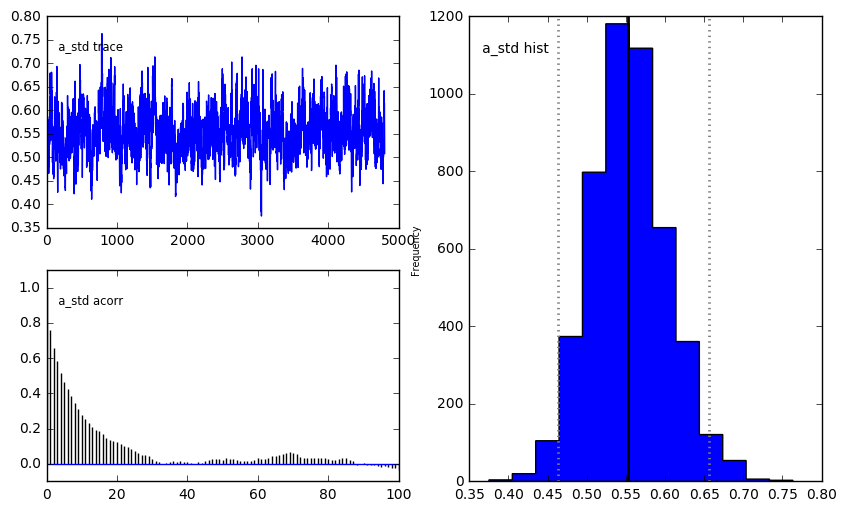

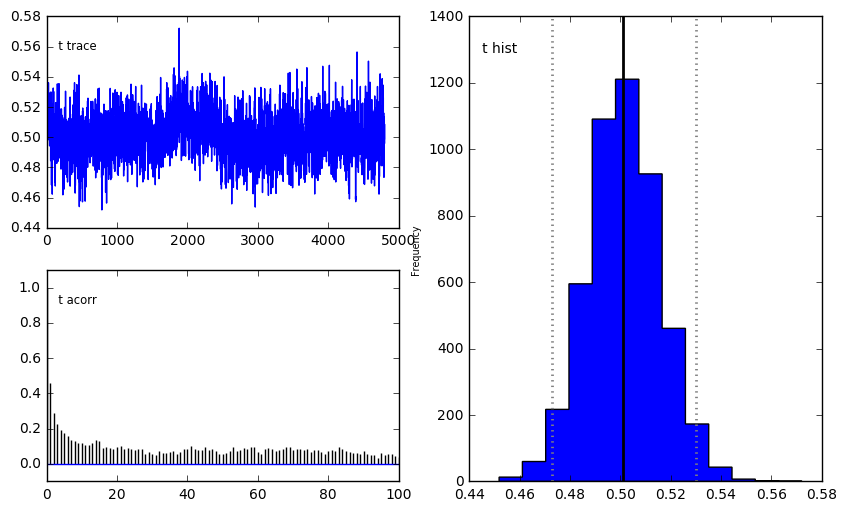

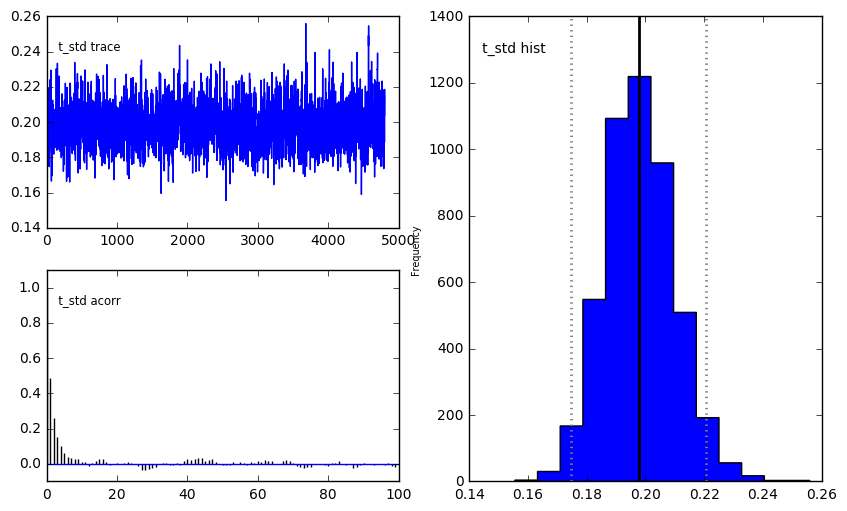

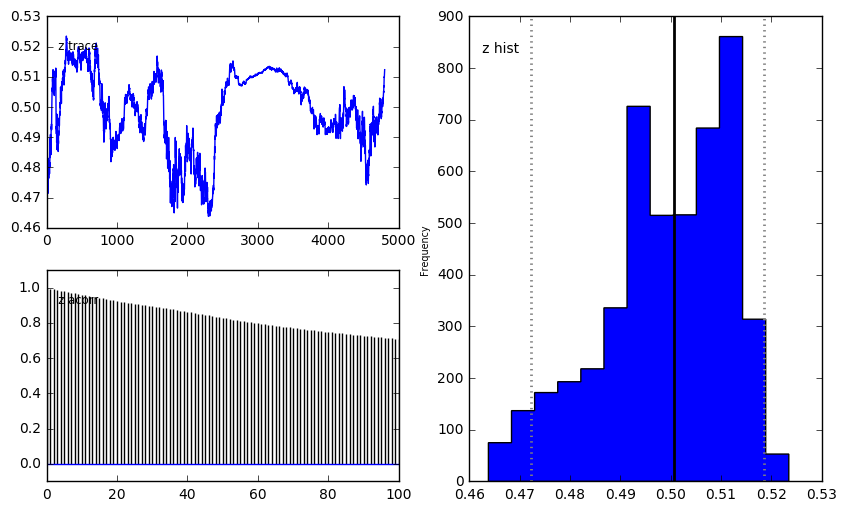

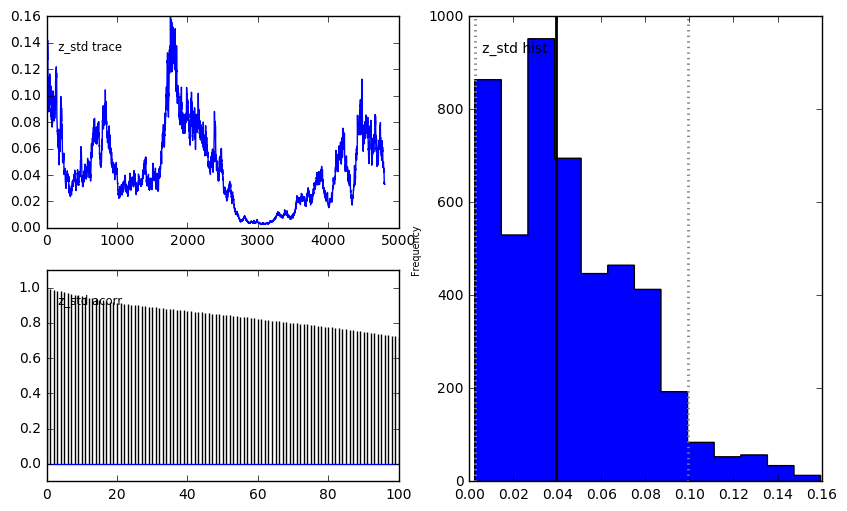

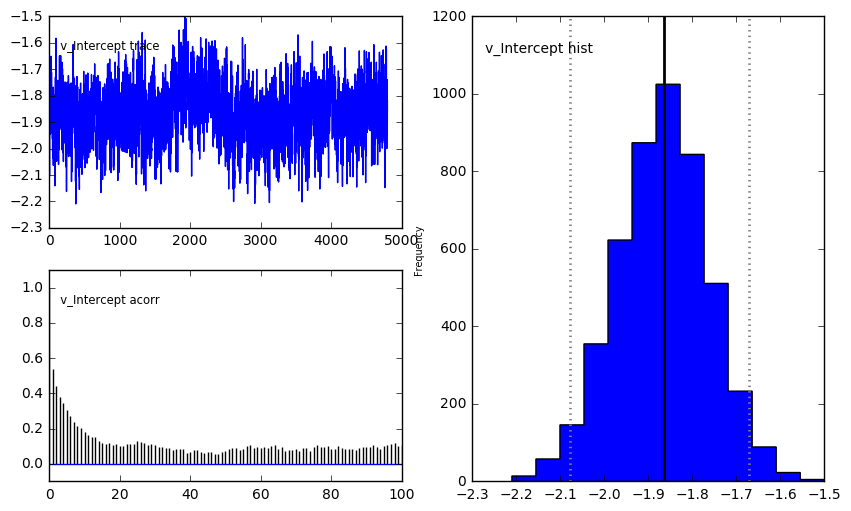

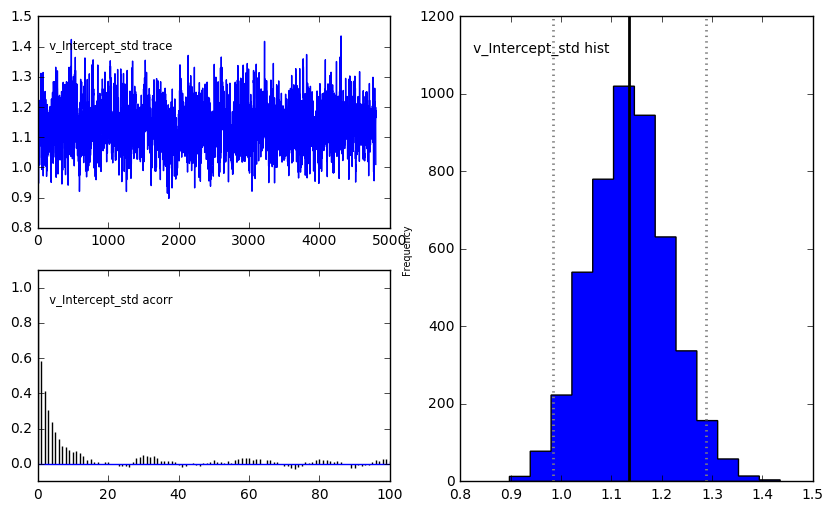

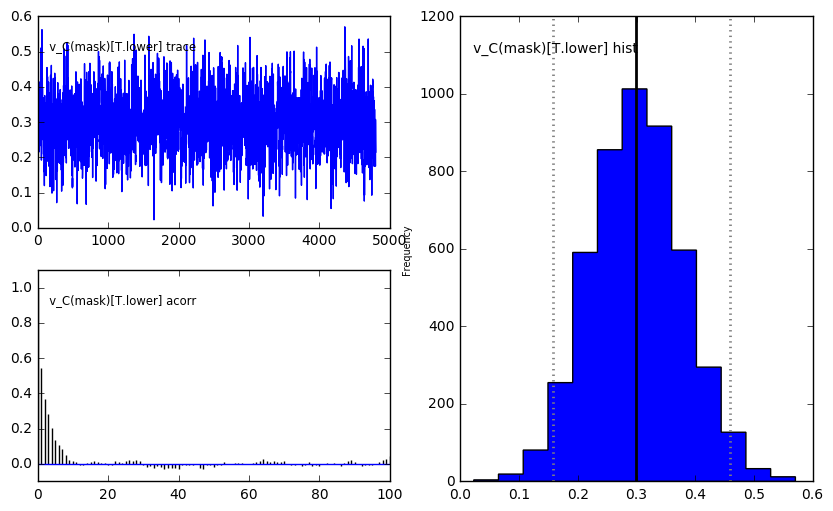

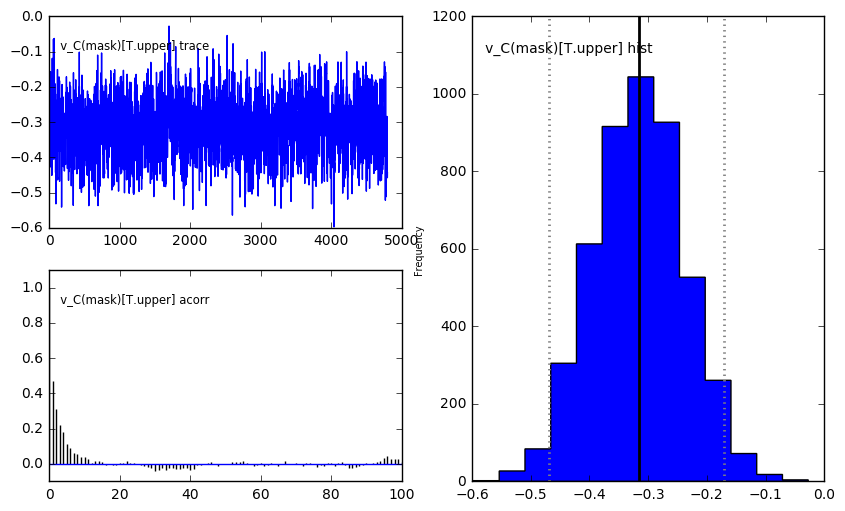

In [7]:
# run model
m_fa.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_fa.print_stats()
m_fa.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q       25q  \
a                                  1.76119  0.0532098   1.65998   1.72441   
a_std                             0.554122  0.0486147  0.463569  0.521077   
a_subj.09coqg8hlpux6fe             1.40879   0.284513  0.954445   1.20736   
a_subj.0b3t2skj9mlhbkn             1.85991   0.484589   1.09356   1.50187   
a_subj.0bcg7mtj2n1jjw9             2.70007    0.51084   1.83337   2.33336   
a_subj.0s53r30oouek89b             2.54817   0.401117    1.8641   2.26443   
a_subj.0uj9gbhag3o1w1v             1.71267   0.350874   1.14375   1.45521   
a_subj.17nzn4k8r1qkmrn             2.02083   0.418044   1.34548   1.71523   
a_subj.1fdkw2qjx3hc3lk             1.52804   0.284683     1.049   1.32253   
a_subj.1mla0dmotqefnav             2.01088   0.448812   1.30067   1.69082   
a_subj.23hr9tl84h3zhw3             1.99813   0.419627   1.33171   1.70175   
a_subj.27muqwvalwne26r             1.67846    0.44158  0.986787    1.3507   

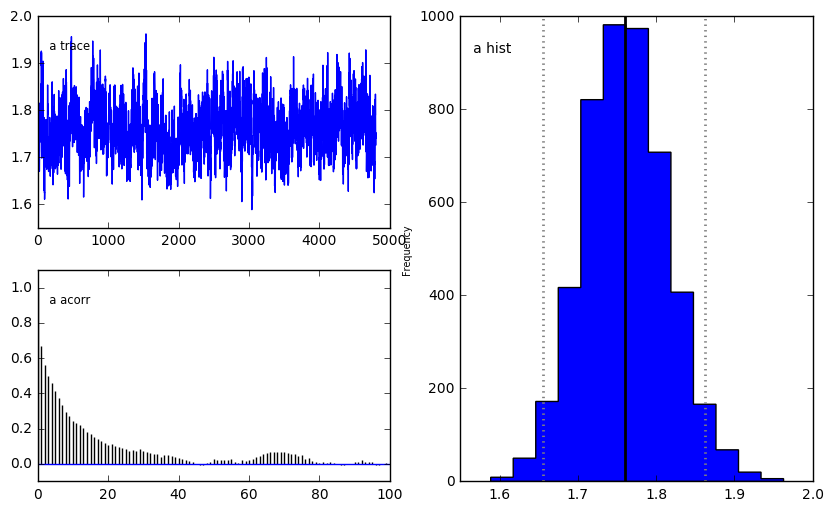

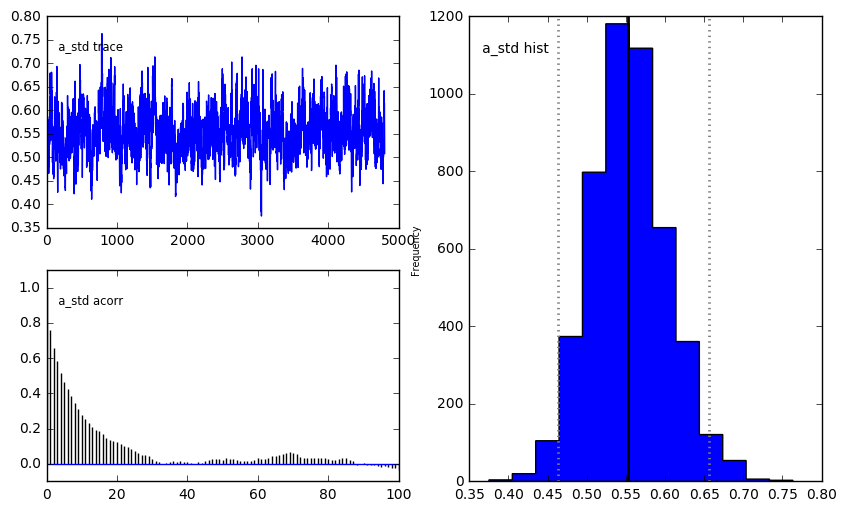

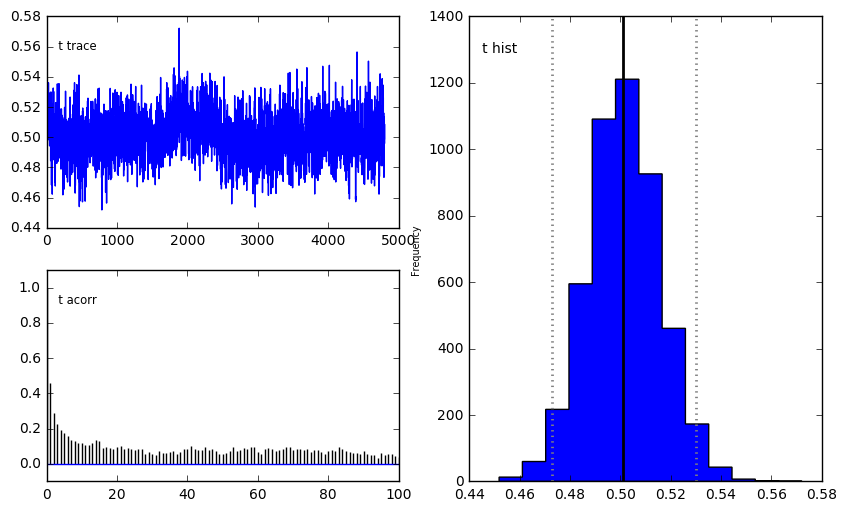

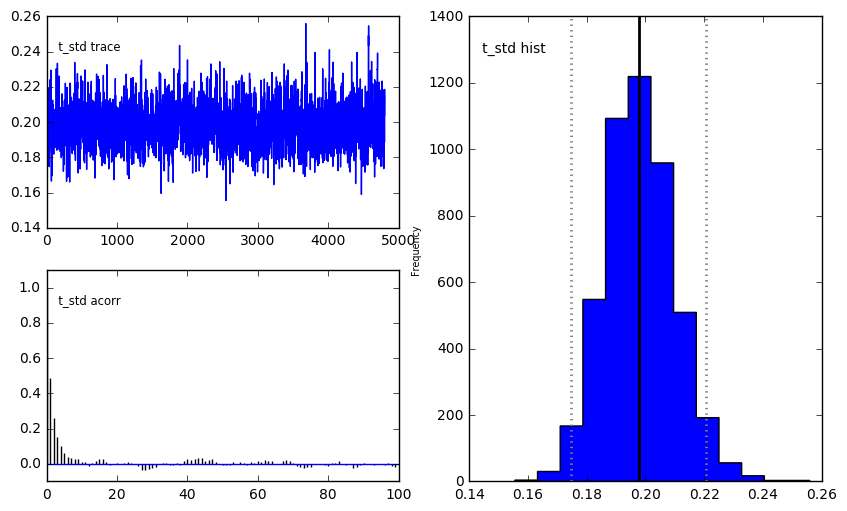

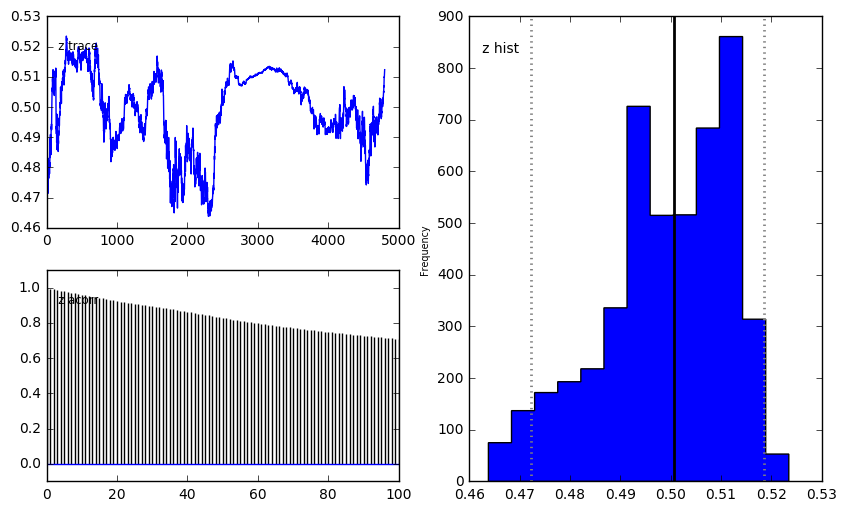

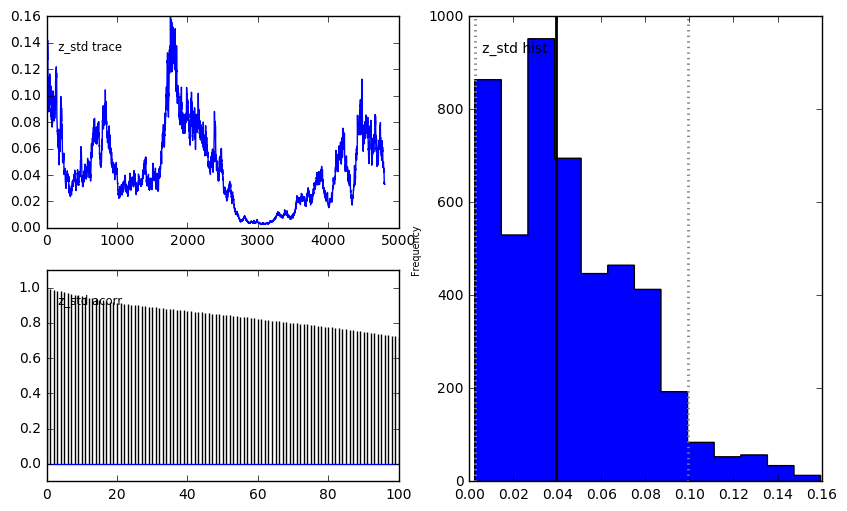

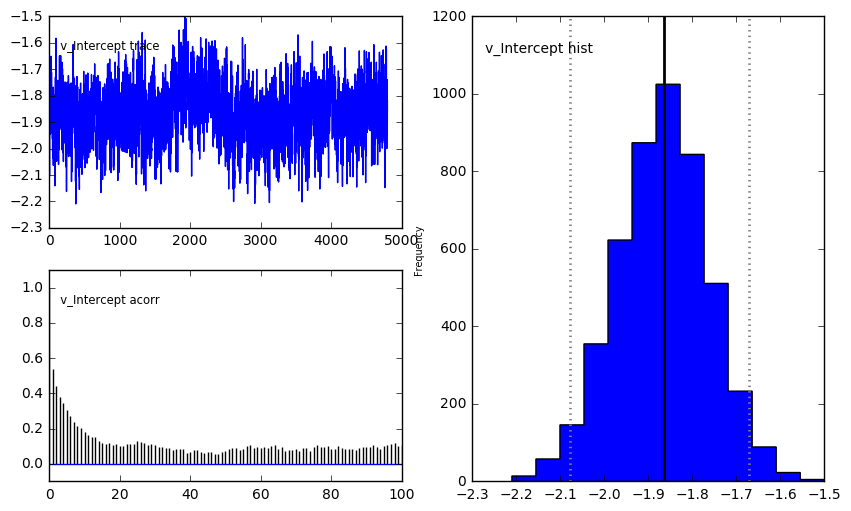

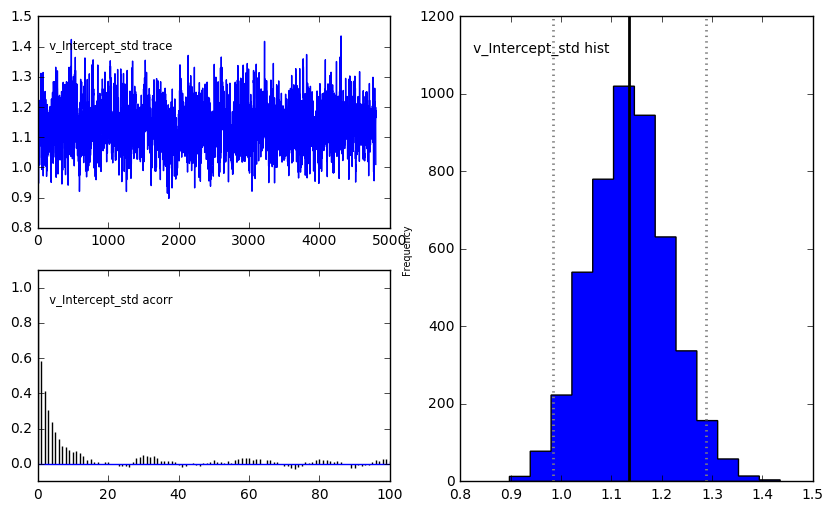

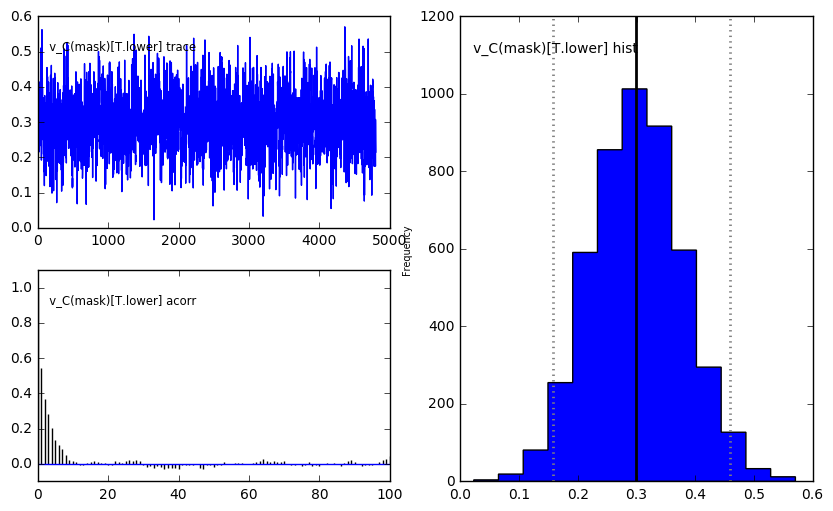

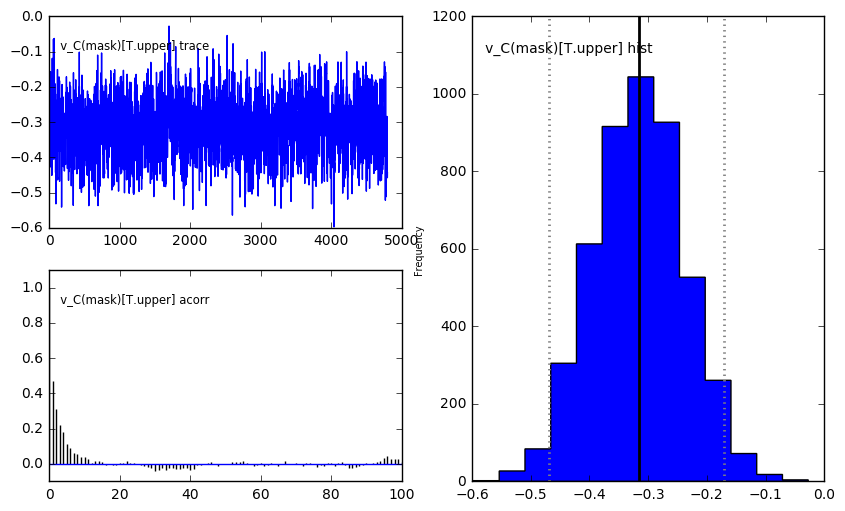

In [17]:
# save model stats
fa_stats = m_fa.gen_stats()
print(fa_stats)
fa_stats.to_csv('fa_5000/faceMask_hddm_drift_maskFalsePositives_fa_5000.csv', index=True)

# save model posterior plots
m_fa.plot_posteriors(path='fa_5000/_posteriors', save=True)

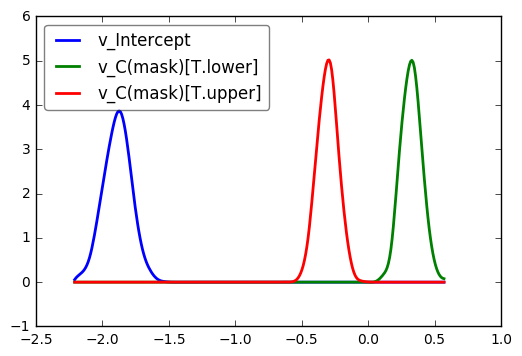

In [18]:
# plot model posteriors by mask
fa_v_none, fa_v_lower, fa_v_upper = m_fa.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([fa_v_none, fa_v_lower, fa_v_upper])
plt.savefig('fa_5000/faceMask_hddm_drift_maskFalsePositives_fa_5000_v_mask.pdf')

In [19]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(fa_v_none < 0) = ", (fa_v_none.trace() < 0).mean())
print("P(fa_v_lower < 0) = ", (fa_v_lower.trace() < 0).mean())
print("P(fa_v_upper > 0) = ", (fa_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(fa_v_lower < fa_v_upper) = ", (fa_v_lower.trace() < fa_v_upper.trace()).mean())

P(fa_v_none < 0) =  1.0
P(fa_v_lower < 0) =  0.0
P(fa_v_upper > 0) =  0.0
P(fa_v_lower < fa_v_upper) =  0.0


In [20]:
# subset dataset by emotion rating type (fearful) and facial expression (sad)
fs_data = data.loc[(data['emotionRating'] == 'fearful') & (data['expression'] == 'sad')]
fs_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
56,lbmmswtrr0mpvov,1,4,fearful,56,_faces/BM17_S_X.jpg,BM17_S_X,BM17,B,M,sad,baseline,0,-2.133355,0,0,0,0,100,0
62,lbmmswtrr0mpvov,1,4,fearful,62,_faces/AM04_S_X.jpg,AM04_S_X,AM04,A,M,sad,baseline,0,-0.669735,0,0,0,0,100,0
76,lbmmswtrr0mpvov,1,4,fearful,76,_faces/AM04_S_L.jpg,AM04_S_L,AM04,A,M,sad,lower,0,-1.597600,0,0,0,0,50,0
81,lbmmswtrr0mpvov,1,4,fearful,81,_faces/BM17_S_U.jpg,BM17_S_U,BM17,B,M,sad,upper,0,-0.794785,0,0,0,0,50,0
88,lbmmswtrr0mpvov,1,4,fearful,88,_faces/WF02_S_X.jpg,WF02_S_X,WF02,W,F,sad,baseline,0,-0.685980,0,0,0,0,100,0
98,lbmmswtrr0mpvov,1,4,fearful,98,_faces/BM17_S_L.jpg,BM17_S_L,BM17,B,M,sad,lower,1,2.011050,0,0,0,0,50,0
99,lbmmswtrr0mpvov,1,4,fearful,99,_faces/WF02_S_U.jpg,WF02_S_U,WF02,W,F,sad,upper,0,-0.795515,0,0,0,0,50,0
104,lbmmswtrr0mpvov,1,4,fearful,104,_faces/WF02_S_L.jpg,WF02_S_L,WF02,W,F,sad,lower,0,-0.731705,0,0,0,0,50,0
107,lbmmswtrr0mpvov,1,4,fearful,107,_faces/AM04_S_U.jpg,AM04_S_U,AM04,A,M,sad,upper,0,-0.708090,0,0,0,0,50,0
326,mr81dhy9r5lxu8r,0,4,fearful,3,_faces/WF02_S_L.jpg,WF02_S_L,WF02,W,F,sad,lower,1,2.216000,0,0,0,0,50,0


In [21]:
# drop any subjects missing columns in design matrix (otherwise produces error)
fs_data = fs_data[(fs_data.subj_idx != 'dqph4ch0mkofejw') & (fs_data.subj_idx != 'xs5439nm2v85thb')]

In [22]:
# define model
m_fs = hddm.HDDMRegressor(fs_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 40357.8 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q         25q         50q         75q        97.5q       mc err
a                                    1.63602   0.0370987     1.56809        1.61     1.63537     1.66054      1.71112   0.00131706
a_std                               0.420033    0.039014    0.346849    0.393272    0.418564    0.446268     0.500932   0.00189867
a_subj.09coqg8hlpux6fe               1.34322    0.248505    0.913099     1.16394     1.32236     1.50008      1.88586    0.0062458
a_subj.0b3t2skj9mlhbkn               1.75787    0.348084     1.18074     1.50485     1.72479     1.96525      2.54467    0.0080253
a_subj.0bcg7mtj2n1jjw9               2.50537    0.402401     1.82397     2.21641     2.46969     2.75747      3.37092    0.0104615
a_subj.0s53r30oouek89b               2.40795    0.422694     1.72265     2.10756     2.35622     2.65692      3.39926    0.0109535
a_subj.0uj9gbhag3o1w1v                 1.927    0.287879     1.44565     1.71976   

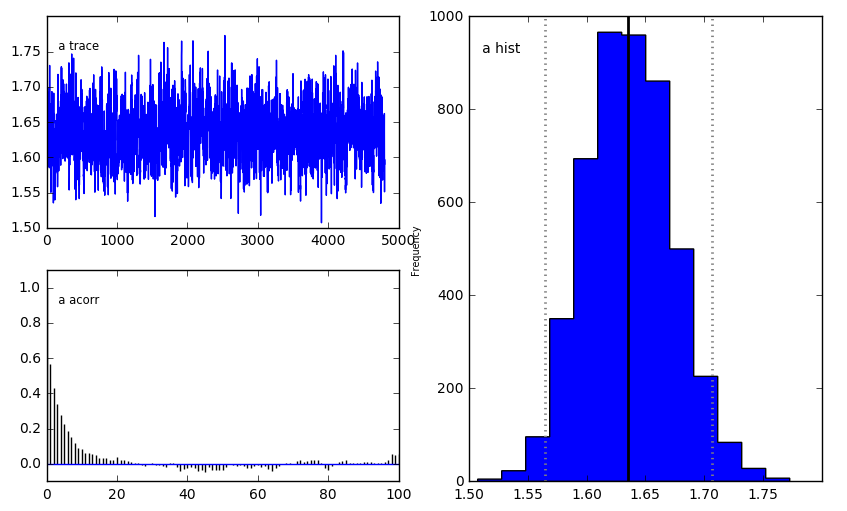

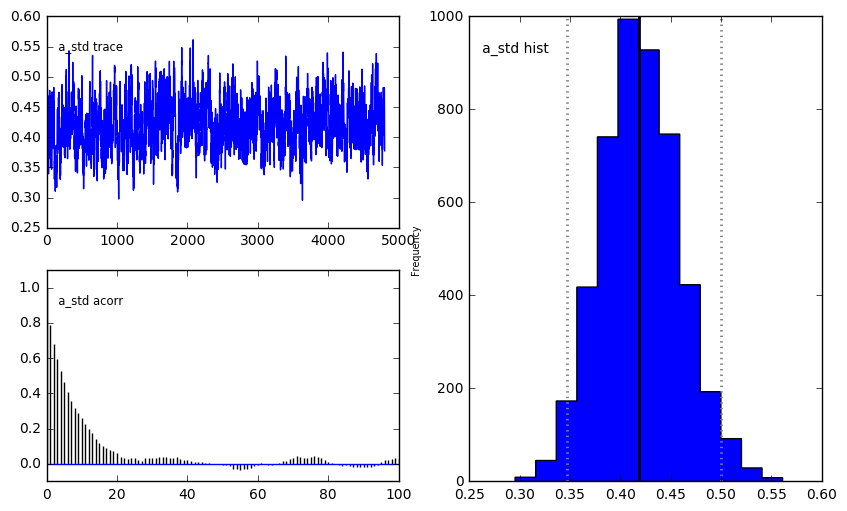

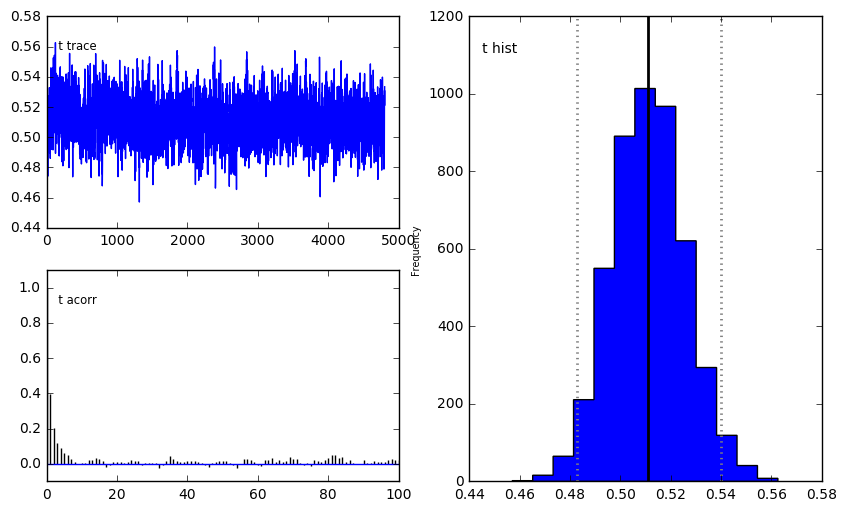

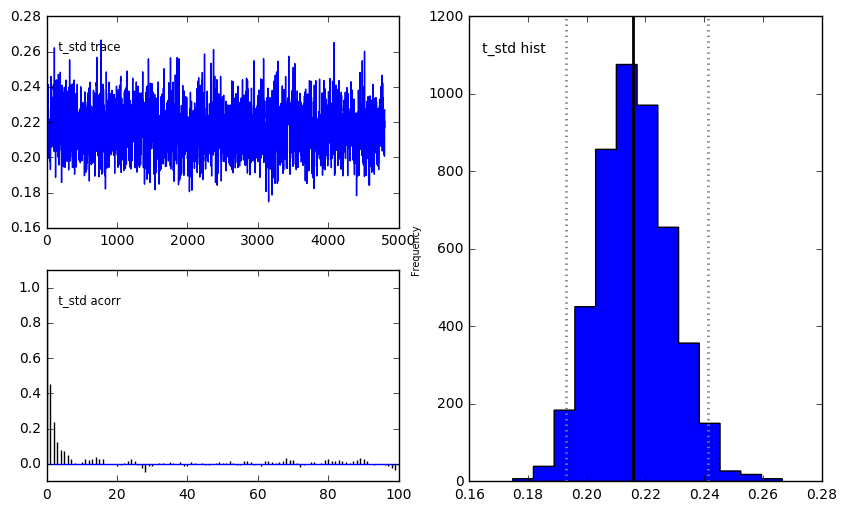

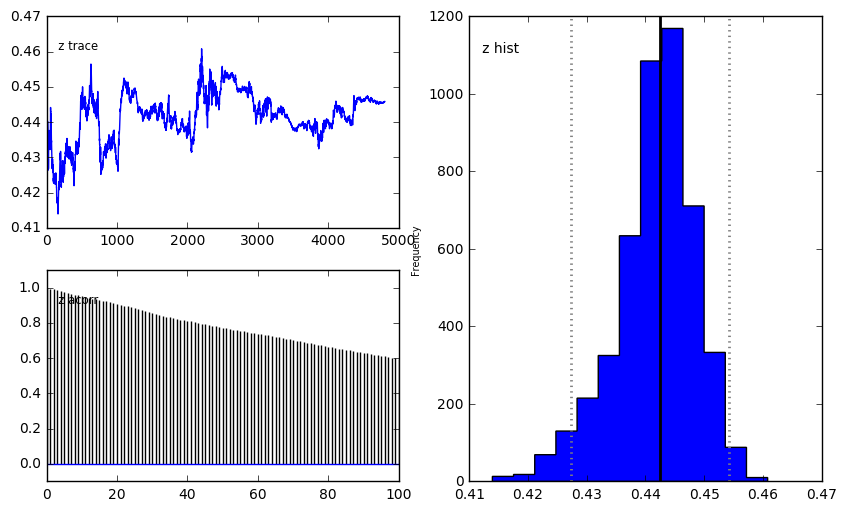

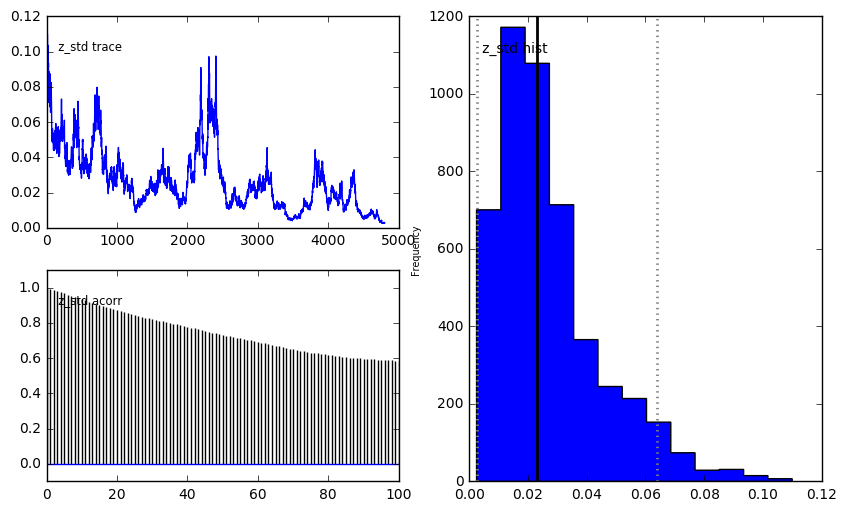

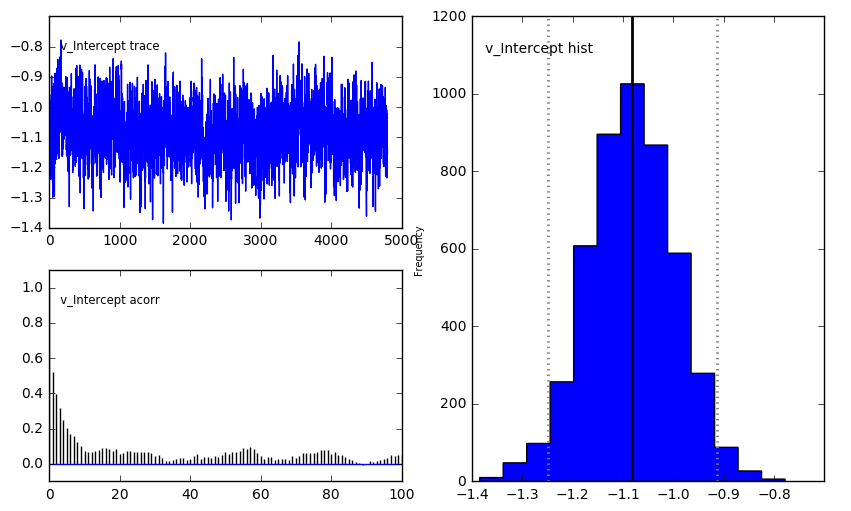

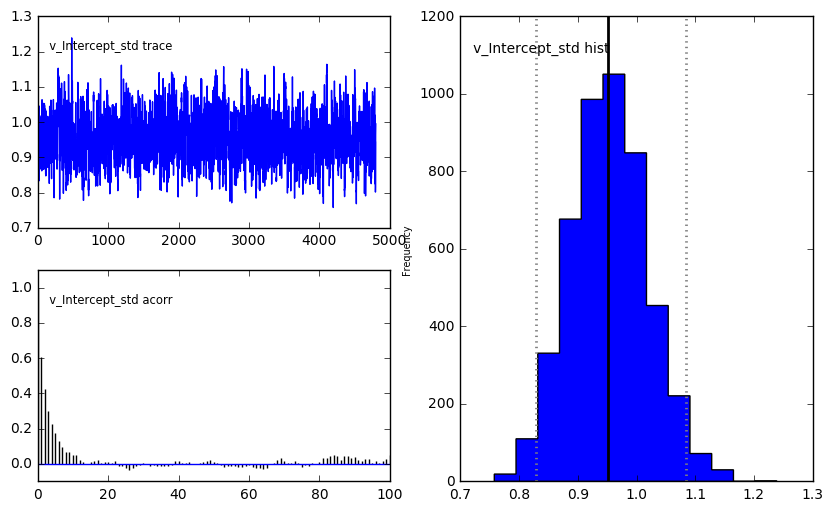

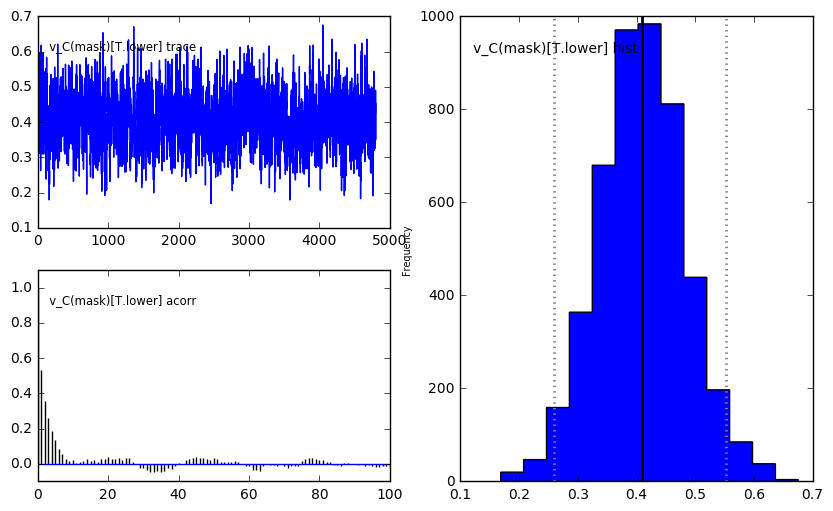

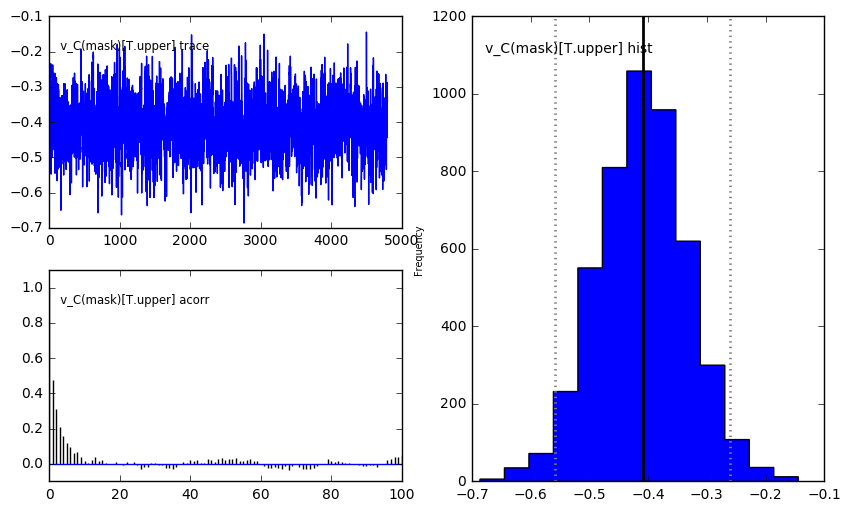

In [23]:
# run model
m_fs.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_fs.print_stats()
m_fs.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q       25q  \
a                                   1.63602  0.0370987   1.56809      1.61   
a_std                              0.420033   0.039014  0.346849  0.393272   
a_subj.09coqg8hlpux6fe              1.34322   0.248505  0.913099   1.16394   
a_subj.0b3t2skj9mlhbkn              1.75787   0.348084   1.18074   1.50485   
a_subj.0bcg7mtj2n1jjw9              2.50537   0.402401   1.82397   2.21641   
a_subj.0s53r30oouek89b              2.40795   0.422694   1.72265   2.10756   
a_subj.0uj9gbhag3o1w1v                1.927   0.287879   1.44565   1.71976   
a_subj.17nzn4k8r1qkmrn              1.93478   0.267796   1.47249    1.7419   
a_subj.1fdkw2qjx3hc3lk              1.66623   0.271046   1.20292   1.47265   
a_subj.1mla0dmotqefnav              1.91816   0.286542   1.44234   1.71422   
a_subj.23hr9tl84h3zhw3              1.56172    0.31739   1.04273   1.34176   
a_subj.27muqwvalwne26r              1.55201   0.245781   1.13569

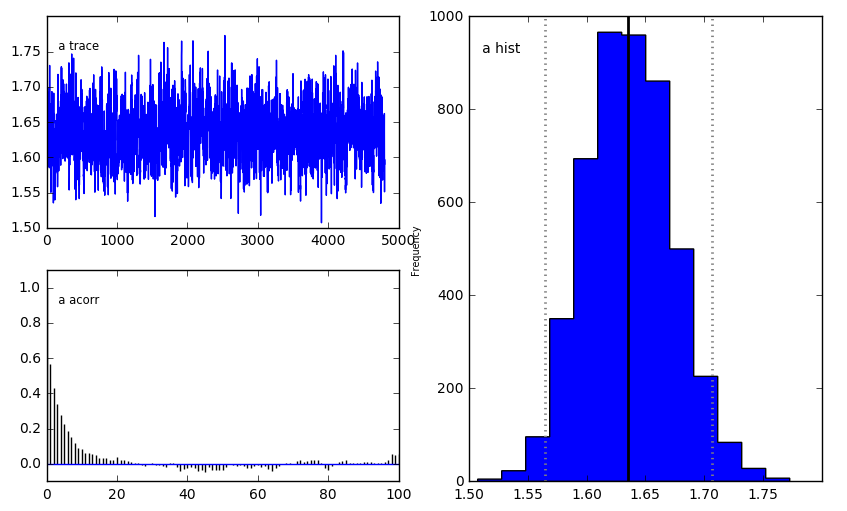

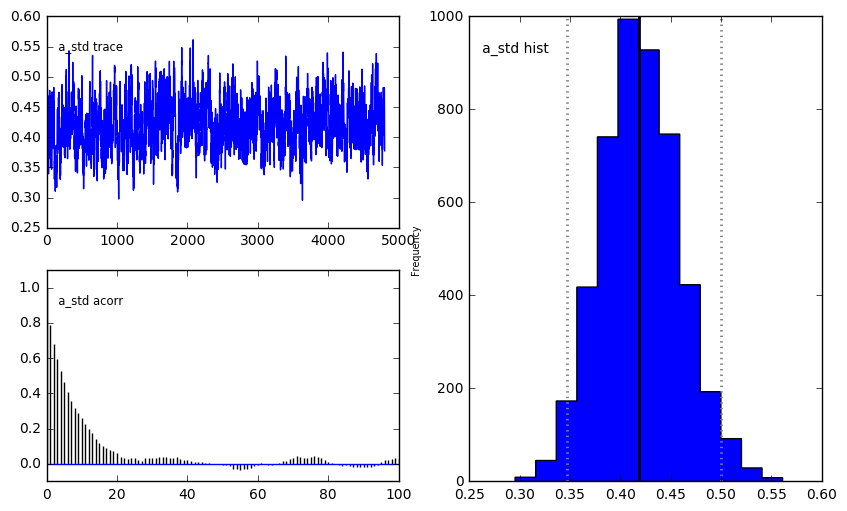

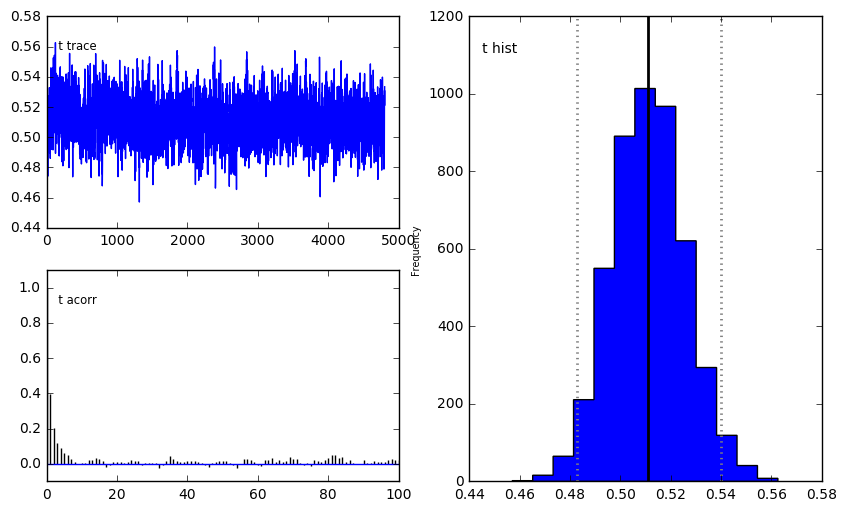

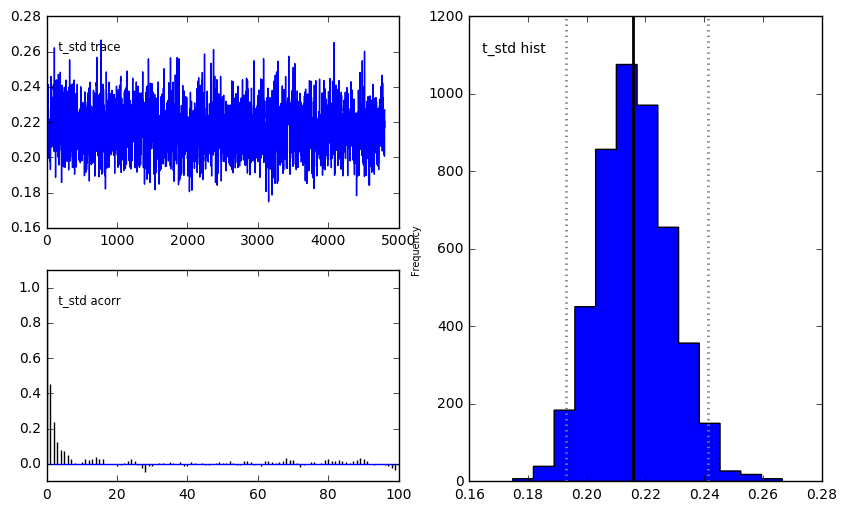

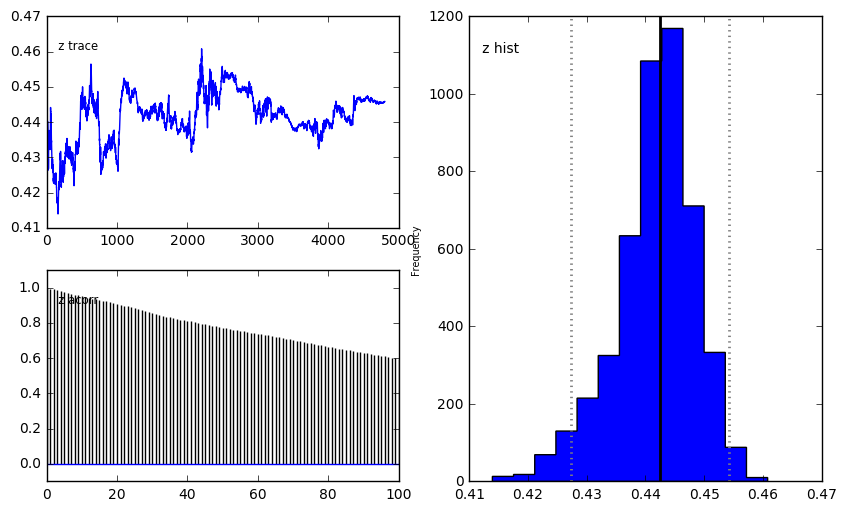

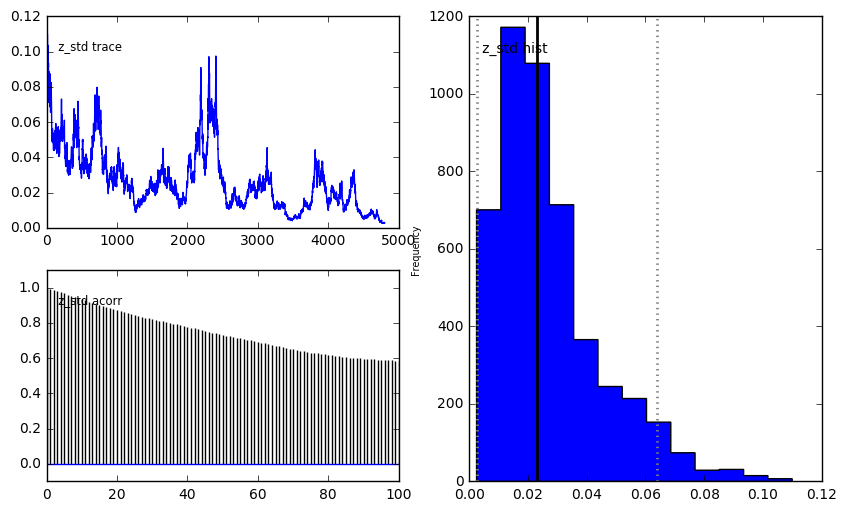

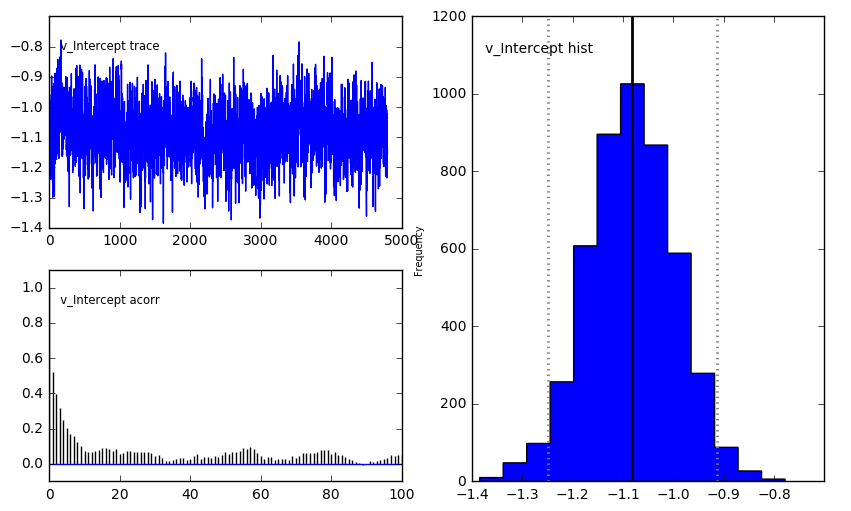

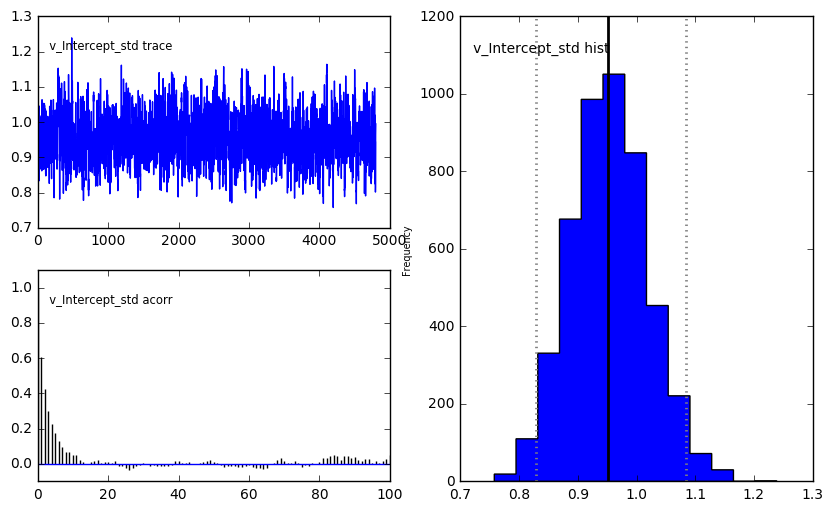

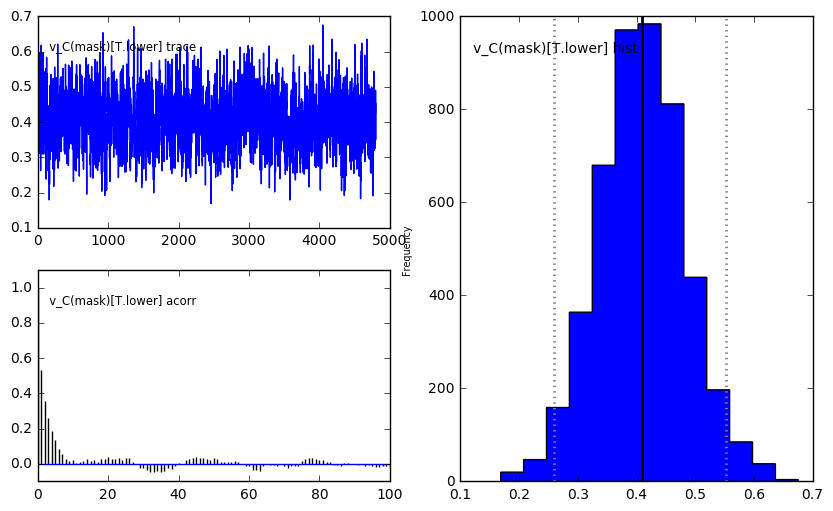

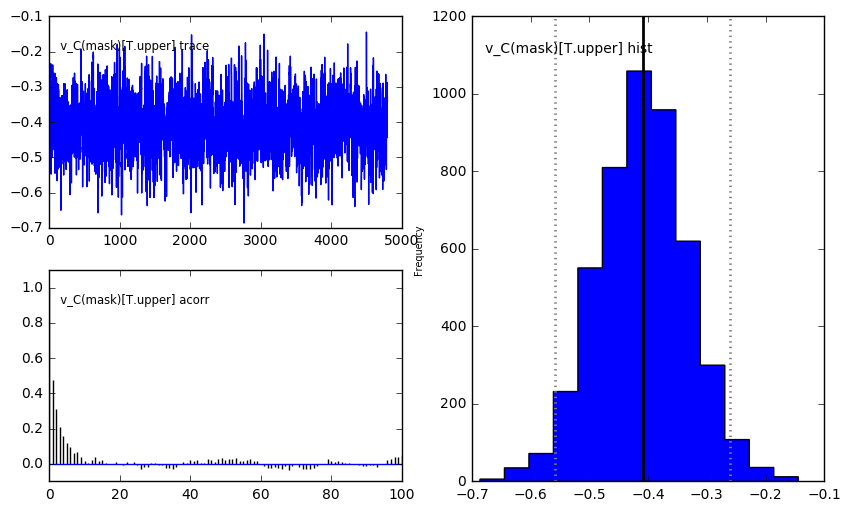

In [24]:
# save model stats
fs_stats = m_fs.gen_stats()
print(fs_stats)
fs_stats.to_csv('fs_5000/faceMask_hddm_drift_maskFalsePositives_fs_5000.csv', index=True)

# save model posterior plots
m_fs.plot_posteriors(path='fs_5000/_posteriors', save=True)

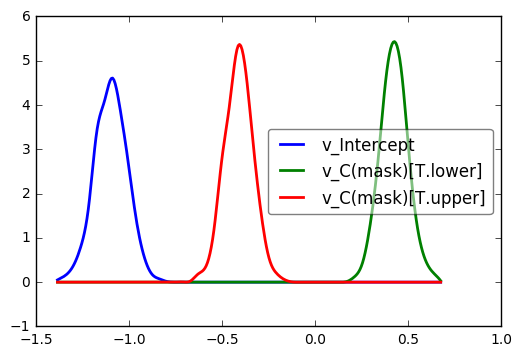

In [25]:
# plot model posteriors by mask
fs_v_none, fs_v_lower, fs_v_upper = m_fs.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([fs_v_none, fs_v_lower, fs_v_upper])
plt.savefig('fs_5000/faceMask_hddm_drift_maskFalsePositives_fs_5000_v_mask.pdf')

In [26]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(fs_v_none < 0) = ", (fs_v_none.trace() < 0).mean())
print("P(fs_v_lower < 0) = ", (fs_v_lower.trace() < 0).mean())
print("P(fs_v_upper > 0) = ", (fs_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(fs_v_lower < fs_v_upper) = ", (fs_v_lower.trace() < fs_v_upper.trace()).mean())

P(fs_v_none < 0) =  1.0
P(fs_v_lower < 0) =  0.0
P(fs_v_upper > 0) =  0.0
P(fs_v_lower < fs_v_upper) =  0.0


In [27]:
# subset dataset by emotion rating type (fearful) and facial expression (surprised)
fr_data = data.loc[(data['emotionRating'] == 'fearful') & (data['expression'] == 'surprised')]
fr_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
54,lbmmswtrr0mpvov,1,4,fearful,54,_faces/HM09_R_X.jpg,HM09_R_X,HM09,H,M,surprised,baseline,1,4.380050,0,0,0,0,0,100
55,lbmmswtrr0mpvov,1,4,fearful,55,_faces/AF09_R_X.jpg,AF09_R_X,AF09,A,F,surprised,baseline,1,1.545015,0,0,0,0,0,100
73,lbmmswtrr0mpvov,1,4,fearful,73,_faces/AF09_R_U.jpg,AF09_R_U,AF09,A,F,surprised,upper,1,2.548550,0,0,0,0,0,50
90,lbmmswtrr0mpvov,1,4,fearful,90,_faces/BM16_R_L.jpg,BM16_R_L,BM16,B,M,surprised,lower,1,1.670110,0,0,0,0,0,50
91,lbmmswtrr0mpvov,1,4,fearful,91,_faces/BM16_R_U.jpg,BM16_R_U,BM16,B,M,surprised,upper,0,-0.579810,0,0,0,0,0,50
94,lbmmswtrr0mpvov,1,4,fearful,94,_faces/AF09_R_L.jpg,AF09_R_L,AF09,A,F,surprised,lower,1,3.052015,0,0,0,0,0,50
96,lbmmswtrr0mpvov,1,4,fearful,96,_faces/HM09_R_U.jpg,HM09_R_U,HM09,H,M,surprised,upper,0,-0.645785,0,0,0,0,0,50
100,lbmmswtrr0mpvov,1,4,fearful,100,_faces/HM09_R_L.jpg,HM09_R_L,HM09,H,M,surprised,lower,1,1.012455,0,0,0,0,0,50
105,lbmmswtrr0mpvov,1,4,fearful,105,_faces/BM16_R_X.jpg,BM16_R_X,BM16,B,M,surprised,baseline,1,0.885050,0,0,0,0,0,100
330,mr81dhy9r5lxu8r,0,4,fearful,7,_faces/HM09_R_U.jpg,HM09_R_U,HM09,H,M,surprised,upper,1,1.716000,0,0,0,0,0,50


In [28]:
# drop any subjects missing columns in design matrix (otherwise produces error)
fr_data = fr_data[(fr_data.subj_idx != 'dqph4ch0mkofejw') & (fr_data.subj_idx != 'xs5439nm2v85thb')]

In [29]:
# define model
m_fr = hddm.HDDMRegressor(fr_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 35301.5 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                         mean         std        2.5q         25q         50q         75q      97.5q       mc err
a                                     1.53678    0.030505     1.47865     1.51594     1.53588     1.55724    1.59931  0.000808893
a_std                                0.392873   0.0298134    0.339973     0.37171    0.391577     0.41266   0.454685   0.00108512
a_subj.09coqg8hlpux6fe                1.05022    0.232169    0.679612    0.877587     1.02495     1.18926    1.58882   0.00706231
a_subj.0b3t2skj9mlhbkn                1.50302    0.219305     1.12511     1.34597      1.4848     1.63533    1.98924   0.00556888
a_subj.0bcg7mtj2n1jjw9                2.25091    0.341457      1.6827     2.00338     2.21957      2.4739     2.9939   0.00926316
a_subj.0s53r30oouek89b                2.08064    0.327976      1.5264     1.84589     2.04506     2.27998    2.81687   0.00936338
a_subj.0uj9gbhag3o1w1v                1.55777    0.235934     1.16095     1.39049      1.5

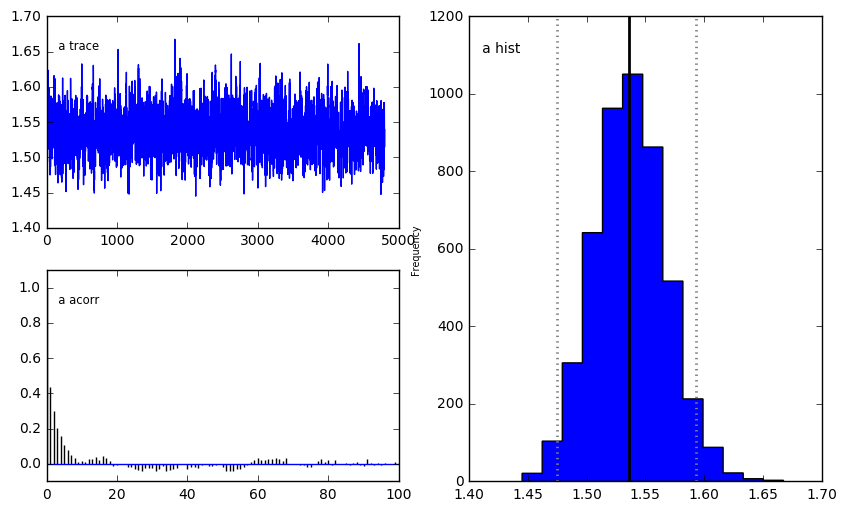

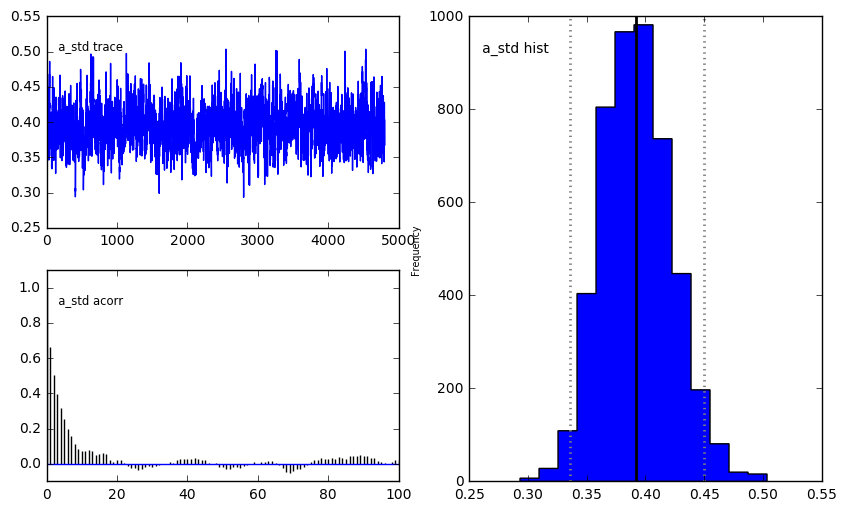

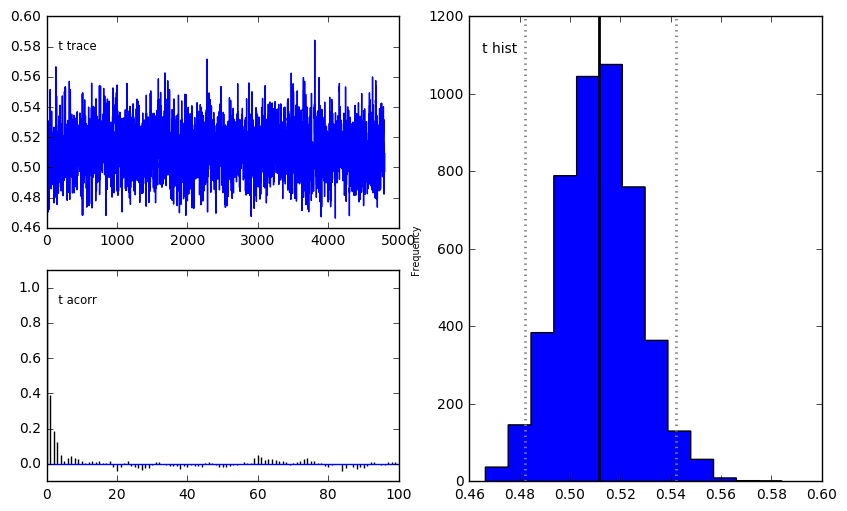

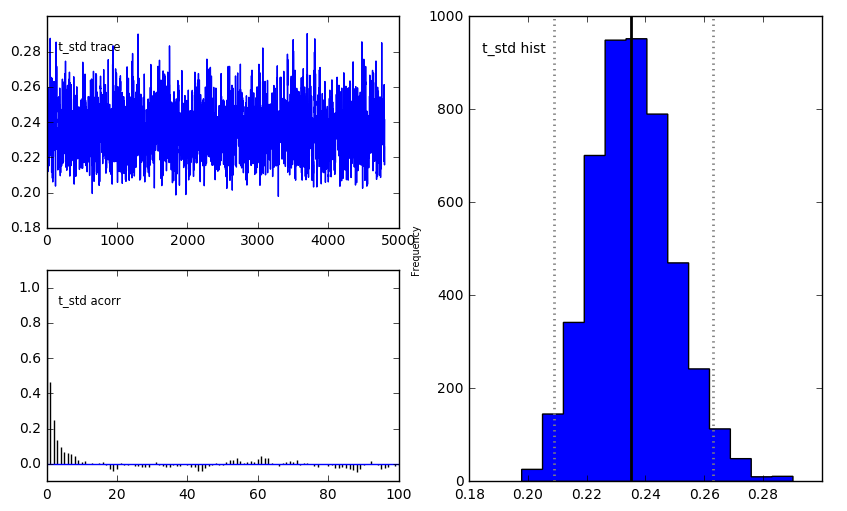

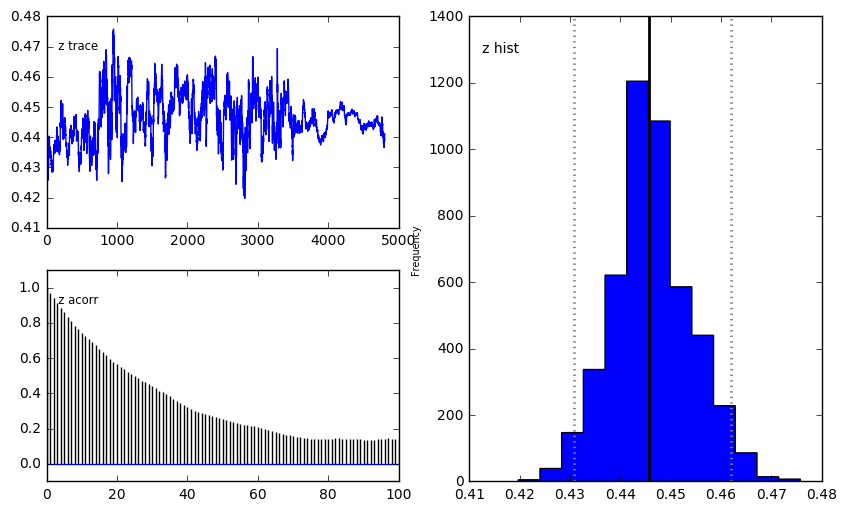

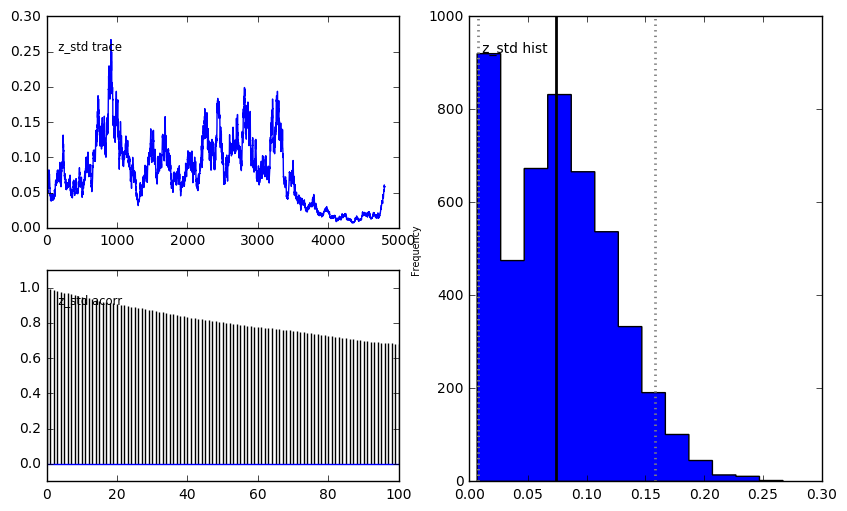

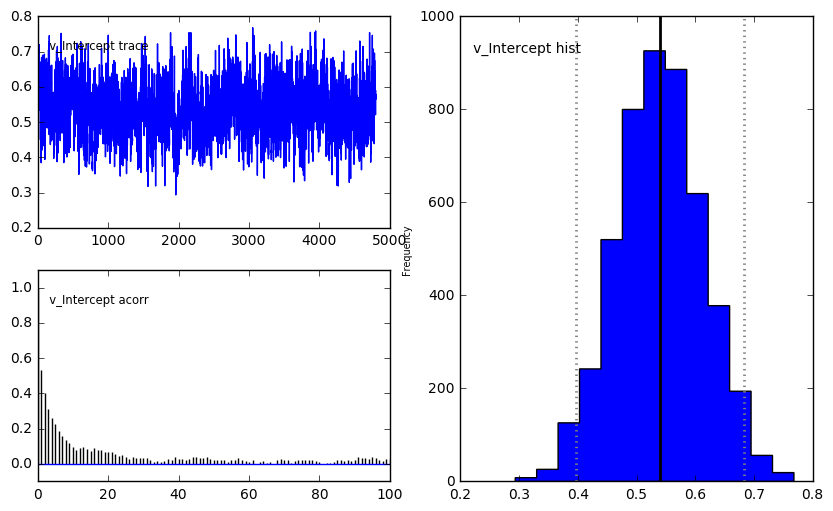

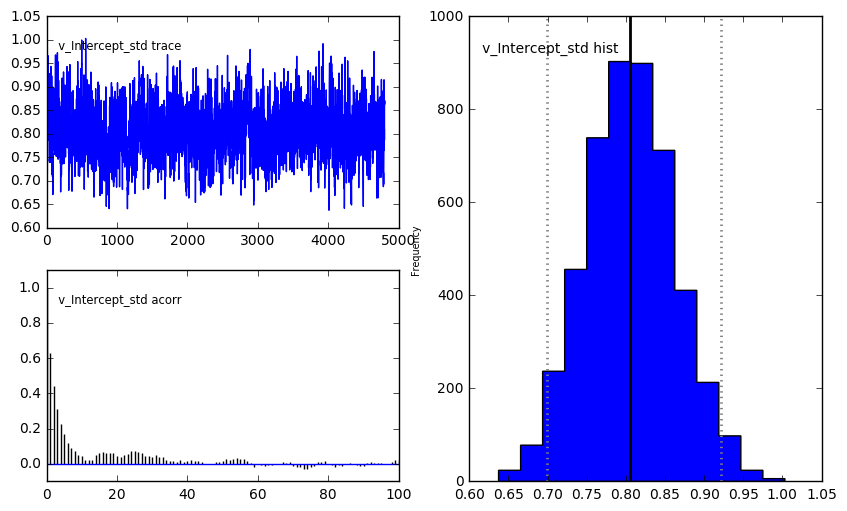

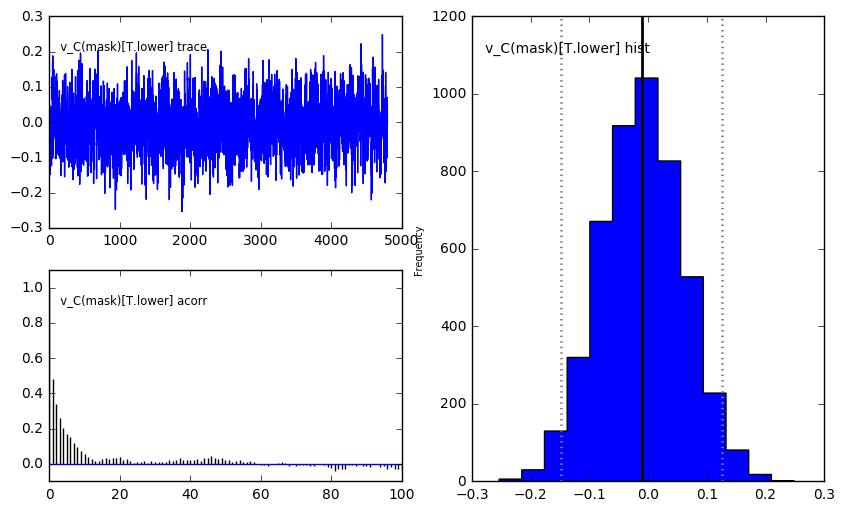

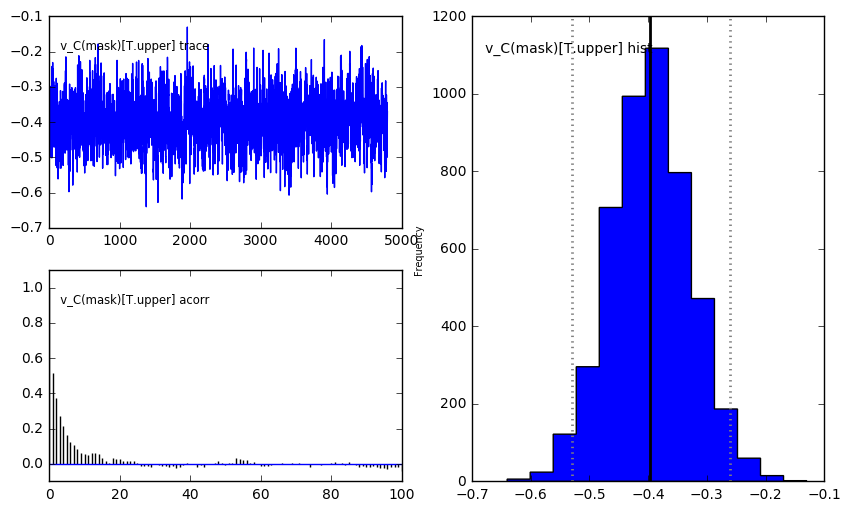

In [30]:
# run model
m_fr.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_fr.print_stats()
m_fr.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q        25q  \
a                                   1.53678   0.030505     1.47865    1.51594   
a_std                              0.392873  0.0298134    0.339973    0.37171   
a_subj.09coqg8hlpux6fe              1.05022   0.232169    0.679612   0.877587   
a_subj.0b3t2skj9mlhbkn              1.50302   0.219305     1.12511    1.34597   
a_subj.0bcg7mtj2n1jjw9              2.25091   0.341457      1.6827    2.00338   
a_subj.0s53r30oouek89b              2.08064   0.327976      1.5264    1.84589   
a_subj.0uj9gbhag3o1w1v              1.55777   0.235934     1.16095    1.39049   
a_subj.17nzn4k8r1qkmrn              1.41624   0.216747     1.05311    1.25982   
a_subj.1fdkw2qjx3hc3lk              1.58694   0.229504     1.19236    1.42481   
a_subj.1mla0dmotqefnav              1.68667    0.22113     1.30348    1.53258   
a_subj.23hr9tl84h3zhw3              1.88662    0.24688     1.46265    1.71241   
a_subj.27muqwvalwne26r      

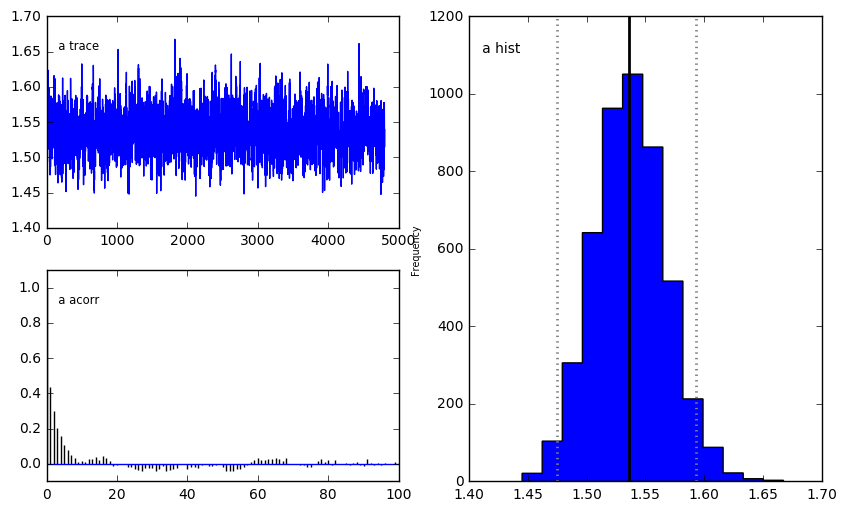

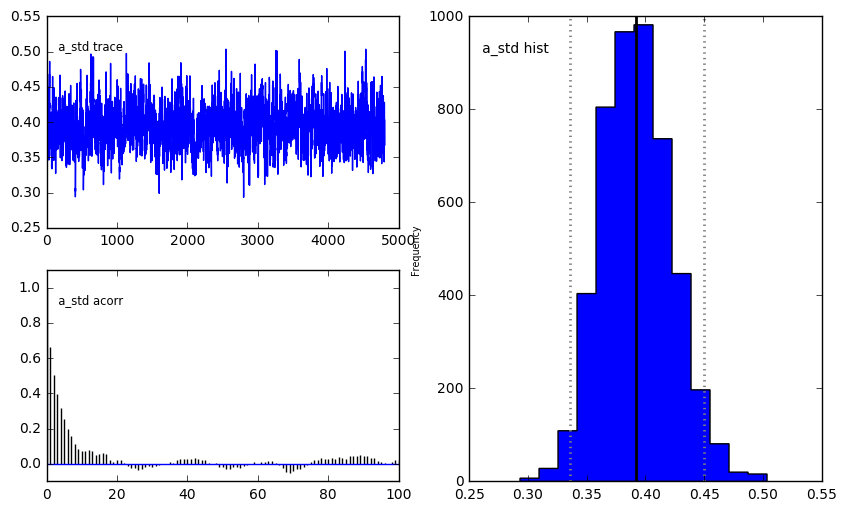

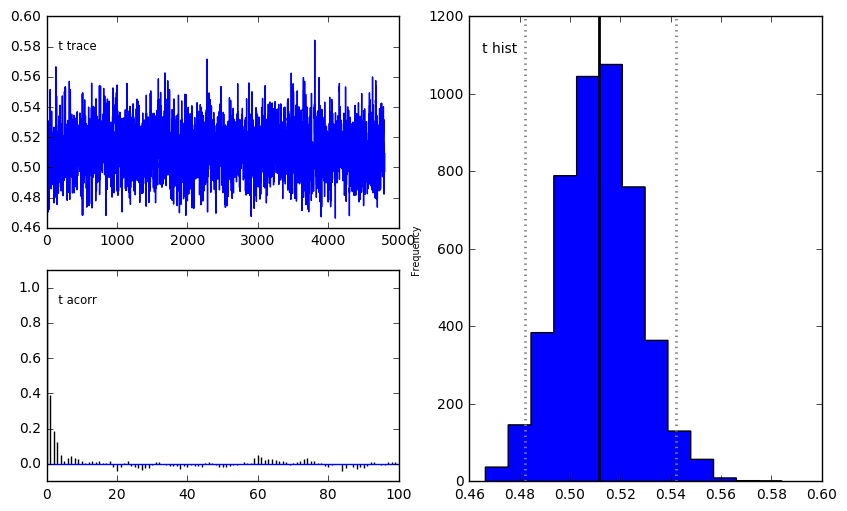

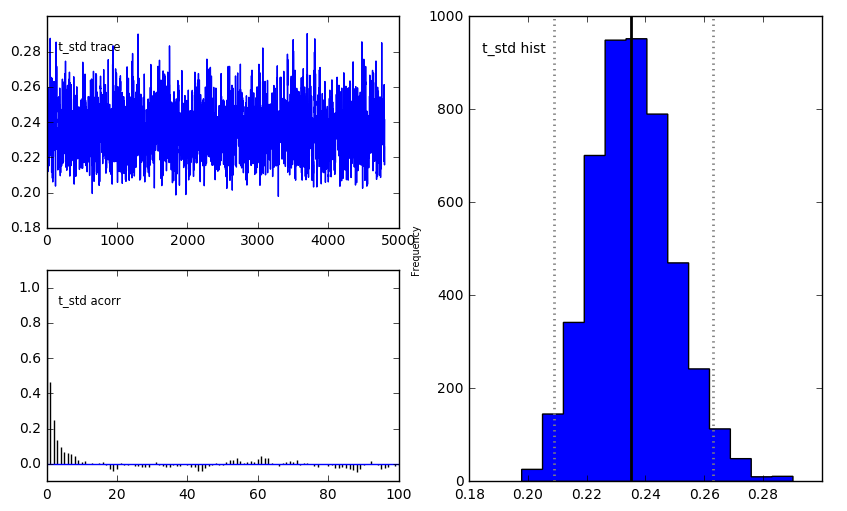

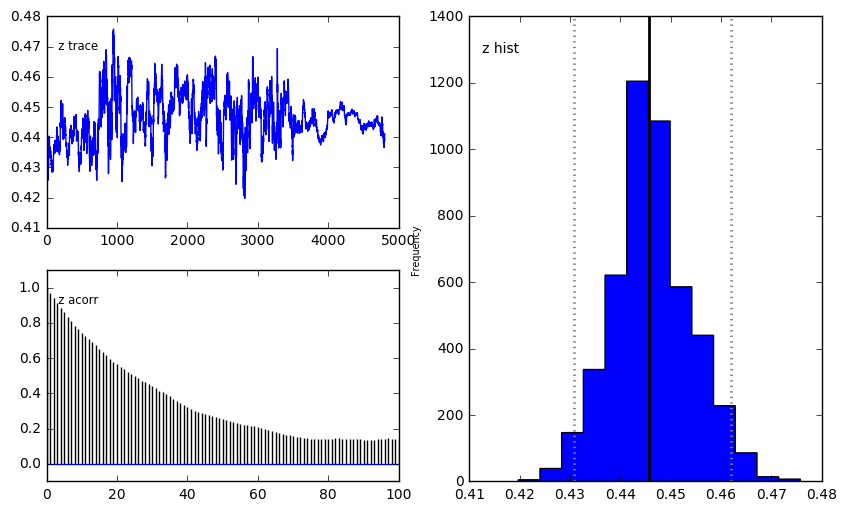

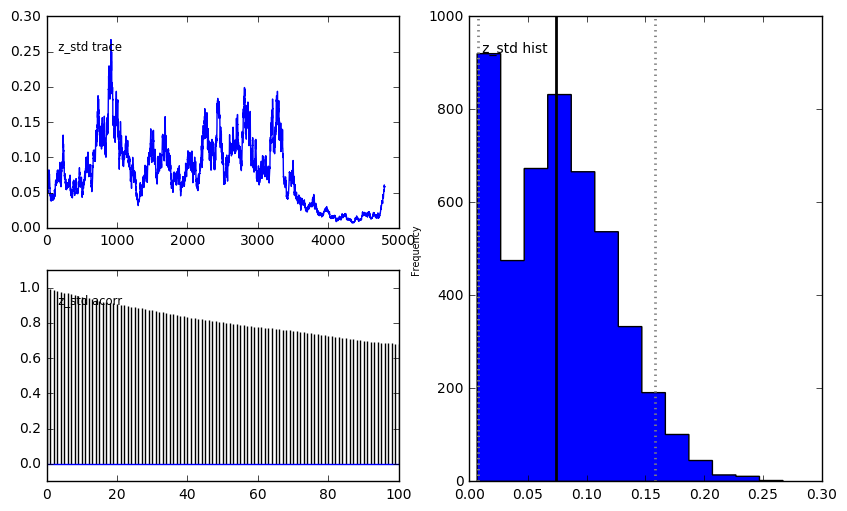

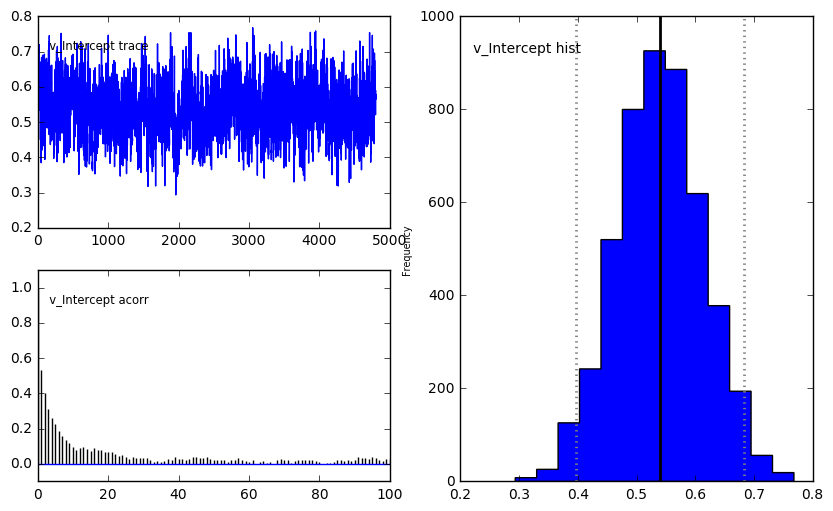

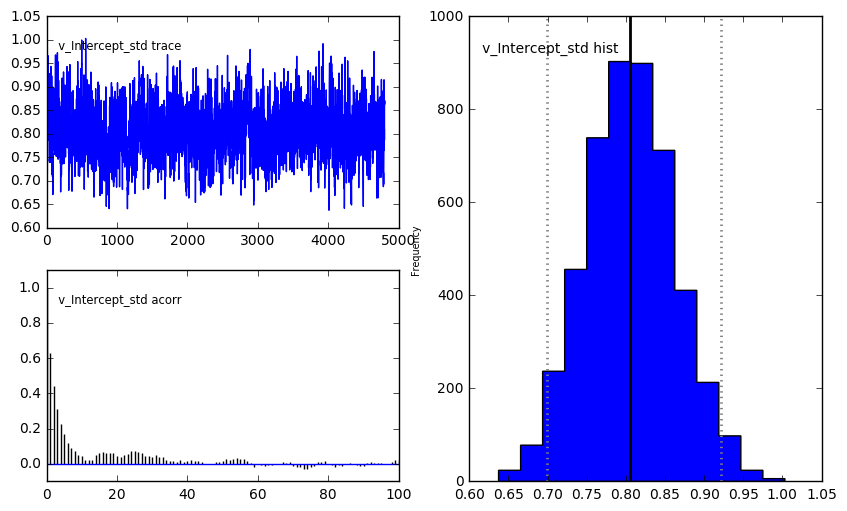

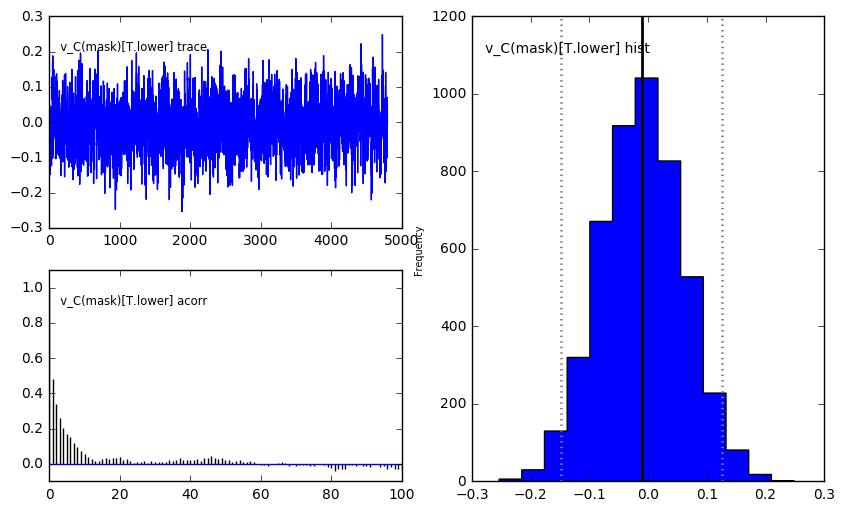

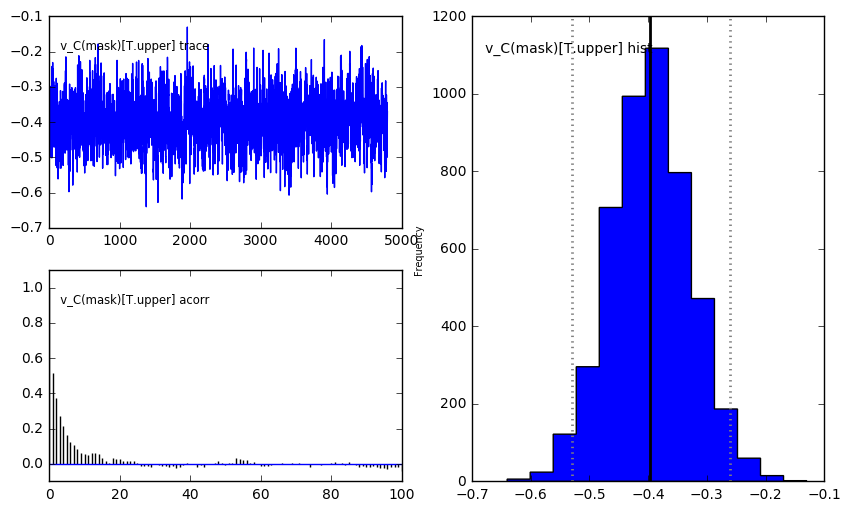

In [31]:
# save model stats
fr_stats = m_fr.gen_stats()
print(fr_stats)
fr_stats.to_csv('fr_5000/faceMask_hddm_drift_maskFalsePositives_fr_5000.csv', index=True)

# save model posterior plots
m_fr.plot_posteriors(path='fr_5000/_posteriors', save=True)

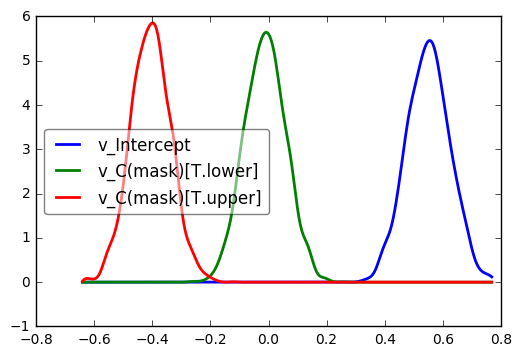

In [32]:
# plot model posteriors by mask
fr_v_none, fr_v_lower, fr_v_upper = m_fr.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([fr_v_none, fr_v_lower, fr_v_upper])
plt.savefig('fr_5000/faceMask_hddm_drift_maskFalsePositives_fr_5000_v_mask.pdf')

In [33]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(fr_v_none < 0) = ", (fr_v_none.trace() < 0).mean())
print("P(fr_v_lower < 0) = ", (fr_v_lower.trace() < 0).mean())
print("P(fr_v_upper > 0) = ", (fr_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(fr_v_lower < fr_v_upper) = ", (fr_v_lower.trace() < fr_v_upper.trace()).mean())

P(fr_v_none < 0) =  0.0
P(fr_v_lower < 0) =  0.561666666667
P(fr_v_upper > 0) =  0.0
P(fr_v_lower < fr_v_upper) =  0.0
